In [1]:
import pandas as pd
import numpy as np

## 서울시 구별 CCTV 현황 분석하기

In [2]:
CCTV_Seoul = pd.read_csv('DataScience_Ing/data/01. CCTV_in_Seoul.csv')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [3]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [7]:
CCTV_Seoul.columns[0]

'기관명'

In [8]:
CCTV_Seoul.rename(columns = {CCTV_Seoul.columns[0] : '구별'}, inplace = True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


### 엑셀파일 읽기 - 서울시 인구현황

In [9]:
pop_Seoul = pd.read_excel('DataScience_Ing/data/01. population_in_Seoul.xls')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [10]:
## header가 3줄이므로 인덱스 2 header만 사용.
## 엑셀의 특정 열만 사용
pop_Seoul = pd.read_excel('DataScience_Ing/data/01. population_in_Seoul.xls', 
                          header = 2,
                          usecols = 'B, D, G, J, N',
                          encoding = 'utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [12]:
pop_Seoul.rename(columns = {pop_Seoul.columns[0] : '구별',
                           pop_Seoul.columns[1] : '인구수',
                           pop_Seoul.columns[2] : '한국인',
                           pop_Seoul.columns[3] : '외국인',
                           pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [30]:
## 가장 적은곳
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

## 가장 많은곳
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [33]:
## 최근 증가율
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] 
                       + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전']*100
CCTV_Seoul.sort_values(by = '최근증가율', ascending = False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


## 서울시 인구 데이터 파악하기

In [34]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [35]:
## 0행 삭제
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [36]:
## RDB의 distinct와 유사
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [37]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [38]:
## pop_Seoul.drop(26) 도 가능
pop_Seoul.drop([26], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [46]:
pop_Seoul.iloc[24]
len(pop_Seoul)

25

In [47]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [48]:
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [50]:
pop_Seoul.sort_values(by='외국인', ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [51]:
pop_Seoul.sort_values(by='외국인비율', ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [53]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [54]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


## CCTV데이터와 인구데이터 합치고 분석하기

In [103]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [106]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [107]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [108]:
## CCTV와 상관있는 변수 확인
## np.corrcoef : 상관계수
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [109]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [110]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [111]:
## CCTV 별
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [112]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## CCTV와 인구현황 그래프로 분석하기

In [200]:
import platform

## matplotlib 한글처리
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False

## 한글지원 폰트처리
if platform.system() == 'Darwin': 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system.. sorry')

In [201]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


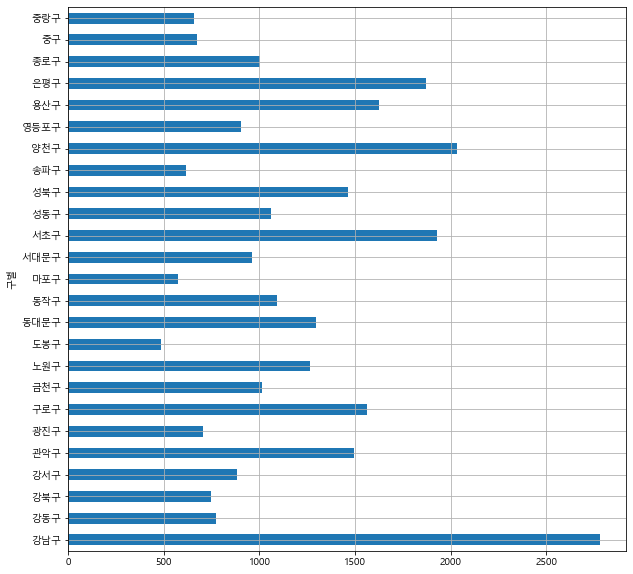

In [202]:
plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

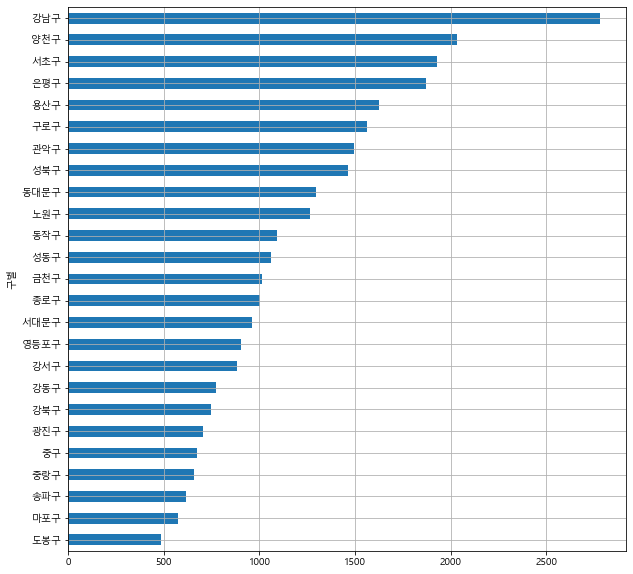

In [206]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

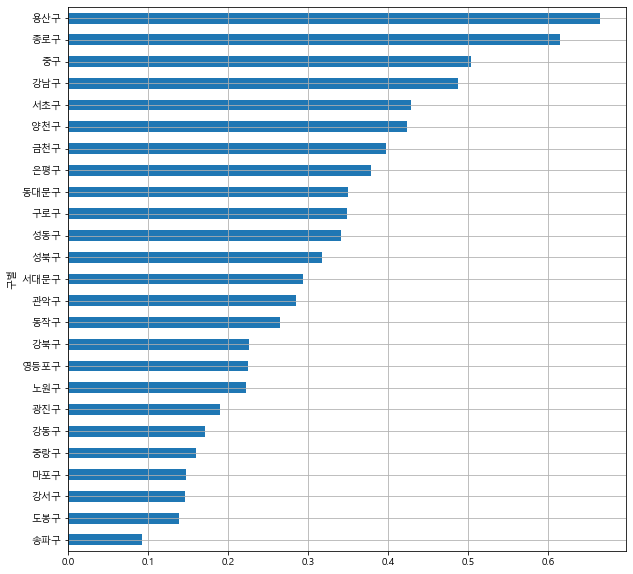

In [207]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

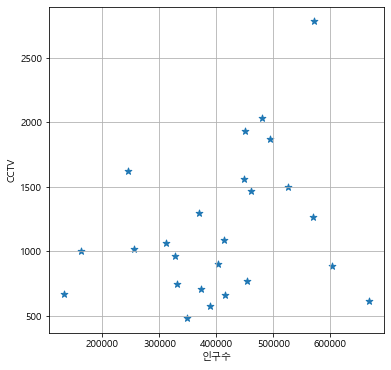

In [219]:
colormap = t

plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50, marker='*')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()

In [223]:
## 단순선형회귀 polyfit(데이터, 1) : 1차항
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [227]:
## poly1d : 1차
f1 = np.poly1d(fp1)
## f1에 데이터를 넣으면 회귀식의 y값이 나옴.
## linspace(a1, a2, 개수) : a1, a2사이에 등간격으로.
fx = np.linspace(100000, 700000, 100)

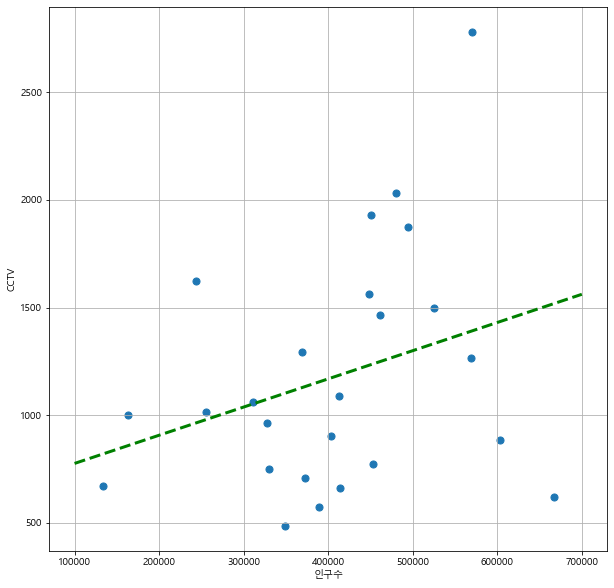

In [226]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()

### 오차가 큰 데이터는 다른 색으로 표현하기

In [228]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'],1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

## 소계(자료값) - f1(인구수) :회귀식 예상 소계(추정값) 
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()


,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


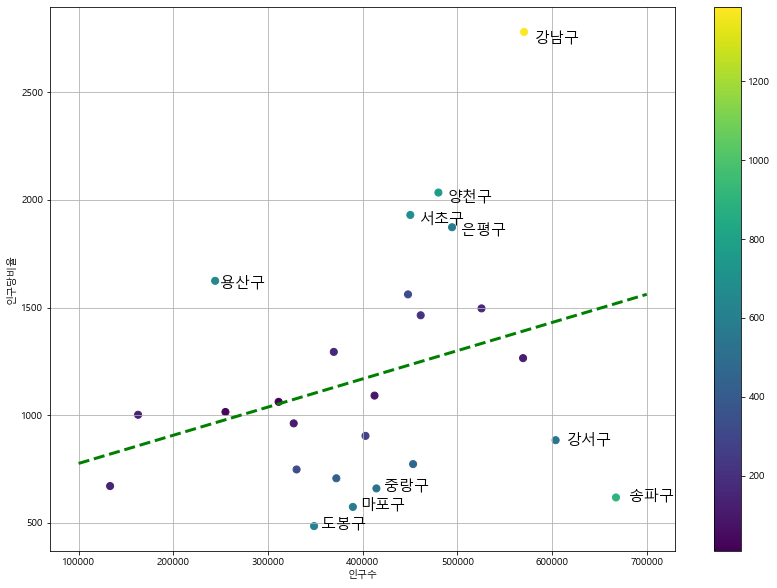

In [229]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], c = data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
            df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()

## matplotlib - 그래프 그리기 기초

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
## jupyter 에 그림을 넣는 명령어(최근엔 없어도 들어감.)

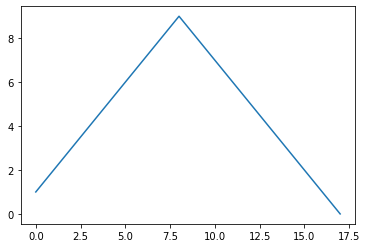

In [118]:
## figure() : 그림 그릴 공간 만들기, figure 한번 할 때마다 판 1개 생김
## show() : 그림 보여주기
plt.figure()
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [119]:
## np에 sin함수 자체내장.
t = np.arange(0,12, 0.01)
y = np.sin(t)

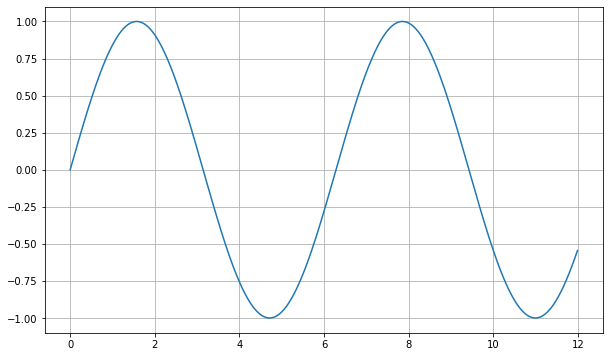

In [132]:
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.grid()
plt.show()

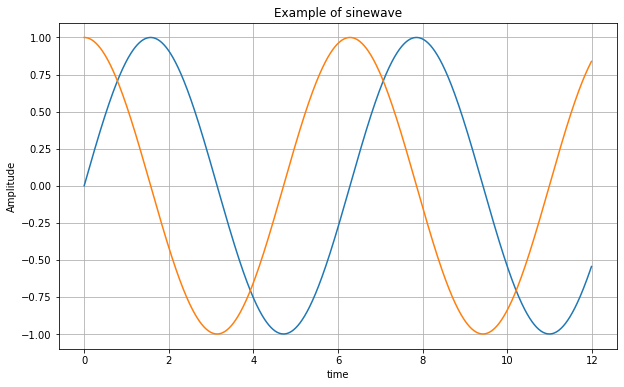

In [135]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

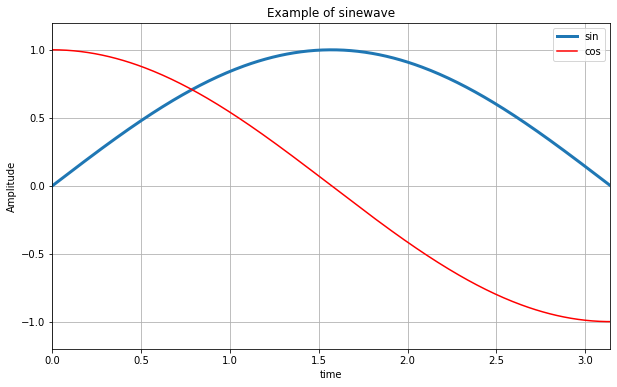

In [198]:
## np.pi : 파이 내장
## lw : 선굵기
t = np.arange(0,12,0.01)
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
## color = 'r'  == 'r'
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()

## legend() : 범례
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.ylim(-1.2, 1.2)
plt.xlim(0, np.pi)
plt.show()

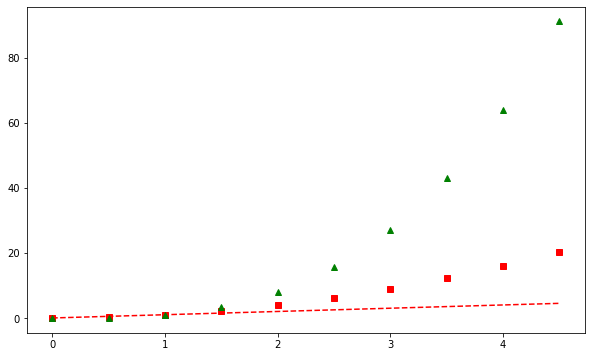

In [152]:
## -- : 점선
## s : square
## ^ : triangle
t = np.arange(0, 5, 0.5)
plt.figure(figsize=(10,6))
plt.plot(t,t,'r--')
plt.plot(t,t**2, 'rs')
plt.plot(t,t**3, 'g^')
plt.show()

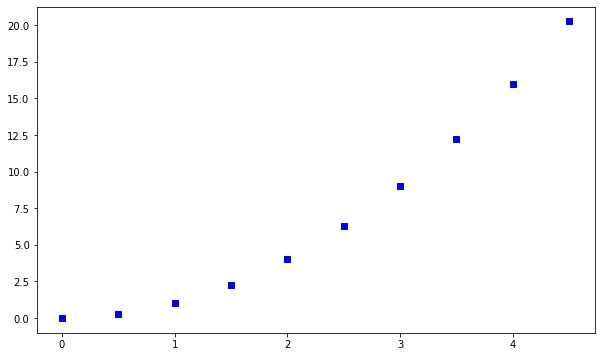

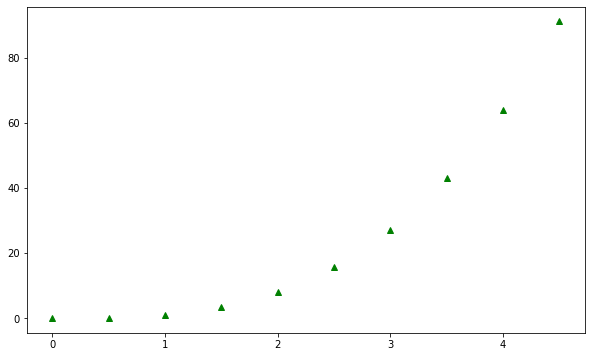

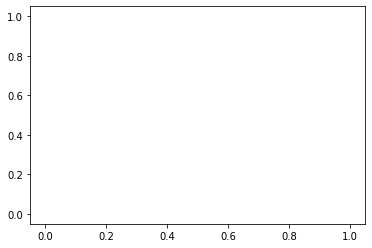

In [156]:
t = np.arange(0,5,0.5)
plt.figure(figsize=(10,6))
pl1 = plt.plot(t, t**2, 'bs')

plt.figure(figsize=(10,6))
pl2 = plt.plot(t, t**3, 'g^')

## 빈 그림판
plt.figure()
plt.plot()
plt.show()

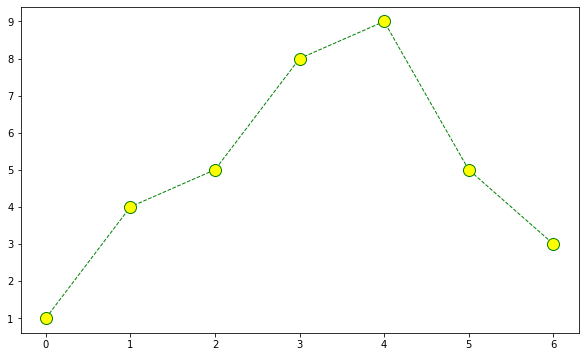

In [168]:
t = [i for i in range(7)]
y = [1,4,5,8,9,5,3]
plt.figure(figsize=(10,6))
## positional argument follows keyword argument
plt.plot(t, y, 'g', lw=1, linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=12)
plt.show()

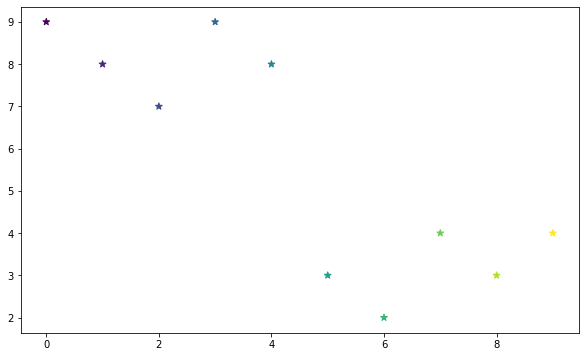

In [179]:
## 산포도 : plt.scatter()
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

colormap = t
plt.figure(figsize=(10,6))
plt.scatter(t,y, s=50, c = colormap, marker='*')
plt.show()

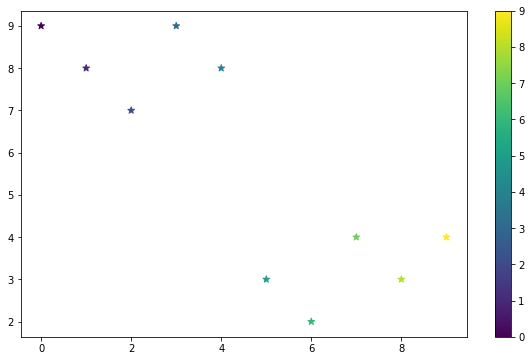

In [181]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s=50, c= colormap, marker='*')
plt.colorbar()
plt.show()

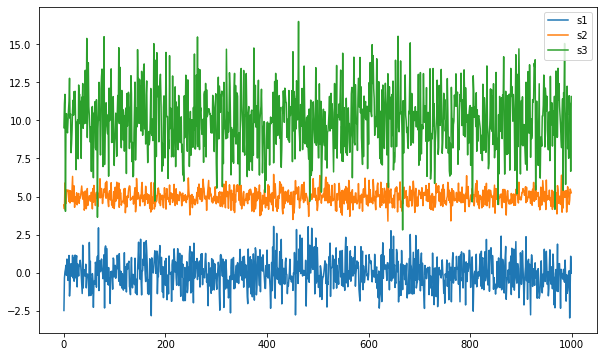

In [186]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

No handles with labels found to put in legend.


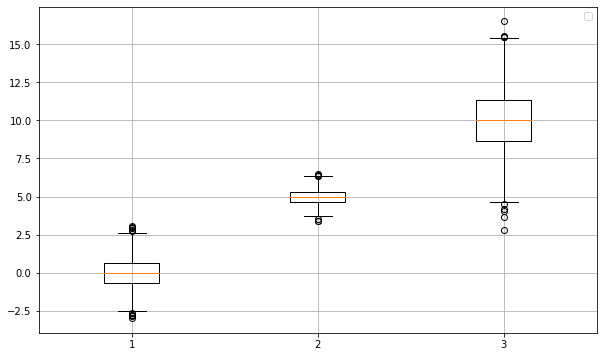

In [188]:
## boxplot : IQR 범위
plt.figure(figsize=(10,6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()

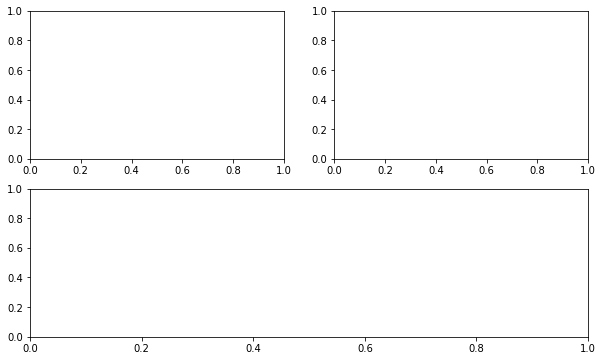

In [189]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,1,2)
plt.show()

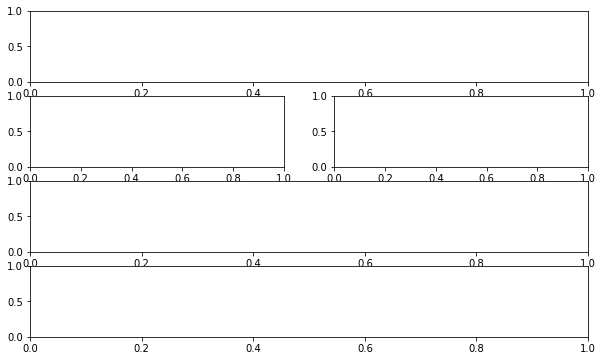

In [190]:
plt.figure(figsize=(10,6))
plt.subplot(411)
plt.subplot(423)
plt.subplot(424)
plt.subplot(413)
plt.subplot(414)


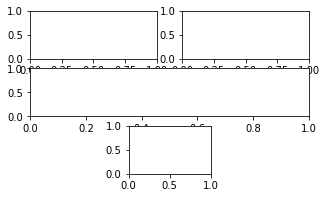

In [195]:
## subplot(ABC)
## A : 행갯수, B : 행을 나눌 블록 수, C : B로 모든 행을 나눴을 때 좌표
plt.figure(figsize=(5,3))
plt.subplot(321)
plt.subplot(322)
plt.subplot(312)
plt.subplot(338)


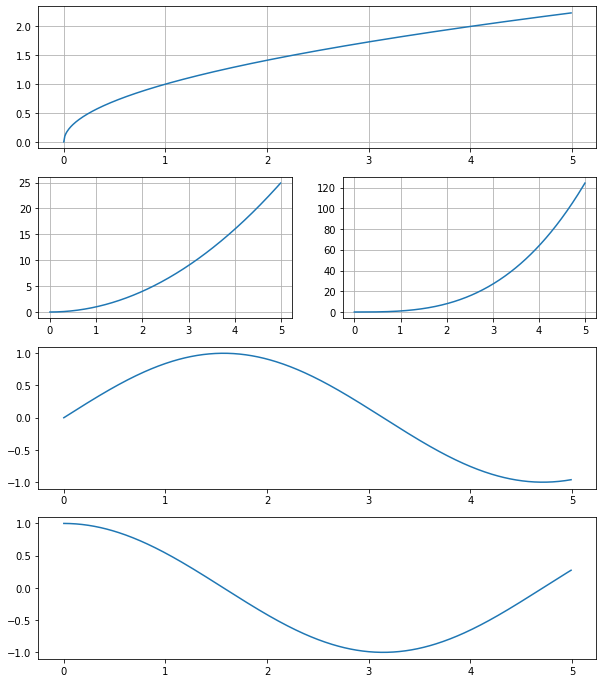

In [197]:
t = np.arange(0, 5, 0.01)
plt.figure(figsize=(10,12))
plt.subplot(411)
plt.plot(t, np.sqrt(t))
plt.grid()

plt.subplot(423)
plt.plot(t, t**2)
plt.grid()

plt.subplot(424)
plt.plot(t, t**3)
plt.grid()

plt.subplot(413)
plt.plot(t, np.sin(t))

plt.subplot(414)
plt.plot(t, np.cos(t))

plt.show()

## 두 dataframe 병합하기

In [84]:
## index =  : 수동으로 인덱스 만들어주기
df1 = pd.DataFrame({'A' : ['A0','A1','A2','A3'],
                   'B' : ['B0','B1','B2','B3'],
                   'C' : ['C0','C1','C2','C3'],
                   'D' : ['D0','D1','D2','D3']},
                  index = [0,1,2,3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[0,1,2,3])
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8,9,10,11])

In [56]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [85]:
df2

,A,B,C,D
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [58]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [83]:
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [87]:
result = pd.concat([df1, df2, df3], keys = ['x','y','z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 0    A4   B4   C4   D4
  1    A5   B5   C5   D5
  2    A6   B6   C6   D6
  3    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [88]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  0),
            ('y',  1),
            ('y',  2),
            ('y',  3),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [90]:
## 0인덱스 열
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [89]:
## 1 인덱스 열
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 0, 1, 2, 3, 8, 9, 10, 11], dtype='int64')

In [66]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [67]:
## concat : axis 속성의 default는 0
result = pd.concat([df1, df4], axis=1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [68]:
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [76]:
## 없어짐.
result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
result

TypeError: concat() got an unexpected keyword argument 'join_axes'

In [91]:
result = pd.concat([df1, df4], ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [94]:
left = pd.DataFrame({'key':['K0','K4','K2','K3'],
                    'A':['A0','A1','A2','A3'],
                    'B' :['B','B1','B2','B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [95]:
left

,key,A,B
0,K0,A0,B
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [96]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [105]:
## merge() : key를 기준으로 병합. default = inner.
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [100]:
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [101]:
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3
3,K1,NaN,NaN,C1,D1


In [102]:
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


## Pandas 기초

In [17]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [18]:
dates = pd.date_range('20200717', periods = 6)
dates

DatetimeIndex(['2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
               '2020-07-21', '2020-07-22'],
              dtype='datetime64[ns]', freq='D')

In [19]:
df = pd.DataFrame(np.random.randn(6,4), index = dates,
                 columns=['A','B','C','D'])
df

,A,B,C,D
2020-07-17,-0.671345,0.809641,-0.836244,1.053817
2020-07-18,-0.134356,0.667417,-0.434403,0.079164
2020-07-19,0.215459,0.987370,-0.828162,0.270710
2020-07-20,-1.059135,-0.995725,-0.489236,-0.702947
2020-07-21,-1.065291,1.692581,-0.778817,1.628421
2020-07-22,-1.363147,-0.177884,-1.052696,1.365402


In [20]:
df.index

DatetimeIndex(['2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
               '2020-07-21', '2020-07-22'],
              dtype='datetime64[ns]', freq='D')

In [21]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [22]:
df.values

array([[-0.67134456,  0.8096411 , -0.83624394,  1.05381689],
       [-0.13435618,  0.6674166 , -0.43440309,  0.07916403],
       [ 0.21545894,  0.98736993, -0.82816226,  0.27070971],
       [-1.05913546, -0.99572469, -0.48923589, -0.70294721],
       [-1.0652906 ,  1.69258128, -0.77881709,  1.62842147],
       [-1.36314727, -0.17788398, -1.05269634,  1.36540153]])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2020-07-17 to 2020-07-22
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [25]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.679636,0.497233,-0.736593,0.615761
std,0.609677,0.946611,0.233463,0.886039
min,-1.363147,-0.995725,-1.052696,-0.702947
25%,-1.063752,0.033441,-0.834224,0.127050
50%,-0.865240,0.738529,-0.803490,0.662263
75%,-0.268603,0.942938,-0.561631,1.287505
max,0.215459,1.692581,-0.434403,1.628421


In [26]:
df.sort_values(by = 'B')

,A,B,C,D
2020-07-20,-1.059135,-0.995725,-0.489236,-0.702947
2020-07-22,-1.363147,-0.177884,-1.052696,1.365402
2020-07-18,-0.134356,0.667417,-0.434403,0.079164
2020-07-17,-0.671345,0.809641,-0.836244,1.053817
2020-07-19,0.215459,0.987370,-0.828162,0.270710
2020-07-21,-1.065291,1.692581,-0.778817,1.628421


In [27]:
df.loc[dates[0]]

A   -0.671345
B    0.809641
C   -0.836244
D    1.053817
Name: 2020-07-17 00:00:00, dtype: float64